# Experiment 12 attention map visualization

In [1]:
import re
import random

import torch
import matplotlib.pyplot as plt

from arithmetic_lm.model import TransformerDecoder, generate
from arithmetic_lm.tokenizer import CharTokenizer
from arithmetic_lm.interp import plot_attn_maps, plot_module
from arithmetic_lm.constants import PLOTS_DIR

import warnings

warnings.filterwarnings("ignore")

In [2]:
tokenizer = CharTokenizer()

In [3]:
def load_model(ckpt_path: str) -> tuple[torch.nn.Module, dict]:
    # load model
    ckpt = torch.load(ckpt_path, map_location="mps")
    model = TransformerDecoder(
        **ckpt["hyper_parameters"]["model_hparams"],
        # vocab_size=tokenizer.vocab_size,
    )
    # state dict has a prefix "model." in the key names
    model.load_state_dict({k[6:]: v for k, v in ckpt["state_dict"].items()})
    model.eval()
    return model, ckpt["hyper_parameters"]

In [4]:
# Exp 15

# CoT + finetuned
# model_name = "cot_finetuned"
# ckpt_path = "../checkpoints/addition-generalize-to-longer/trans_dec_6layers_768embd_4head_cot/step670000-train_loss1.4532-val_loss1.4517.ckpt"

# just answer
# model_name = "answer_only"
# ckpt_path = "../checkpoints/addition-generalize-to-longer/trans_dec_6layers_768embd_4head/step302000-train_loss1.4523-val_loss1.4531.ckpt"

# CoT small
# model_name = "cot_small"
# ckpt_path = "../checkpoints/addition-generalize-to-longer/trans_dec_1layers_768embd_4head_cot/step56000-train_loss0.8101-val_loss0.7337.ckpt"

ckpts = {
    "abs_pe_shift": "../checkpoints/addition-generalize-to-longer/trans_dec_6layers_768embd_4head_10abspeshift/step750000-train_loss1.4077-val_loss1.4930.ckpt",
    "nope": "../checkpoints/addition-generalize-to-longer/trans_dec_6layers_768embd_4head_nope/step284000-train_loss1.4530-val_loss1.8758.ckpt",
    "pre_matching": "../checkpoints/addition-generalize-to-longer/trans_dec_6layers_768embd_4head_pre_matching_v1/step400000-train_loss1.4351-val_loss1.4716.ckpt",
    "rope": "../checkpoints/addition-generalize-to-longer/trans_dec_6layers_768embd_4head_rotary/step116000-train_loss1.4557-val_loss2.7940.ckpt",
}

In [5]:
subdir = PLOTS_DIR / "exp_15"
subdir.mkdir(exist_ok=True)

prompt: '$123456+678901=' 6+6
true_ans: 802357
pred_answer: 802357$
transformer_encoder.layers[0].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[1].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[2].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[3].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[4].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[5].self_attn torch.Size([1, 4, 21, 21])


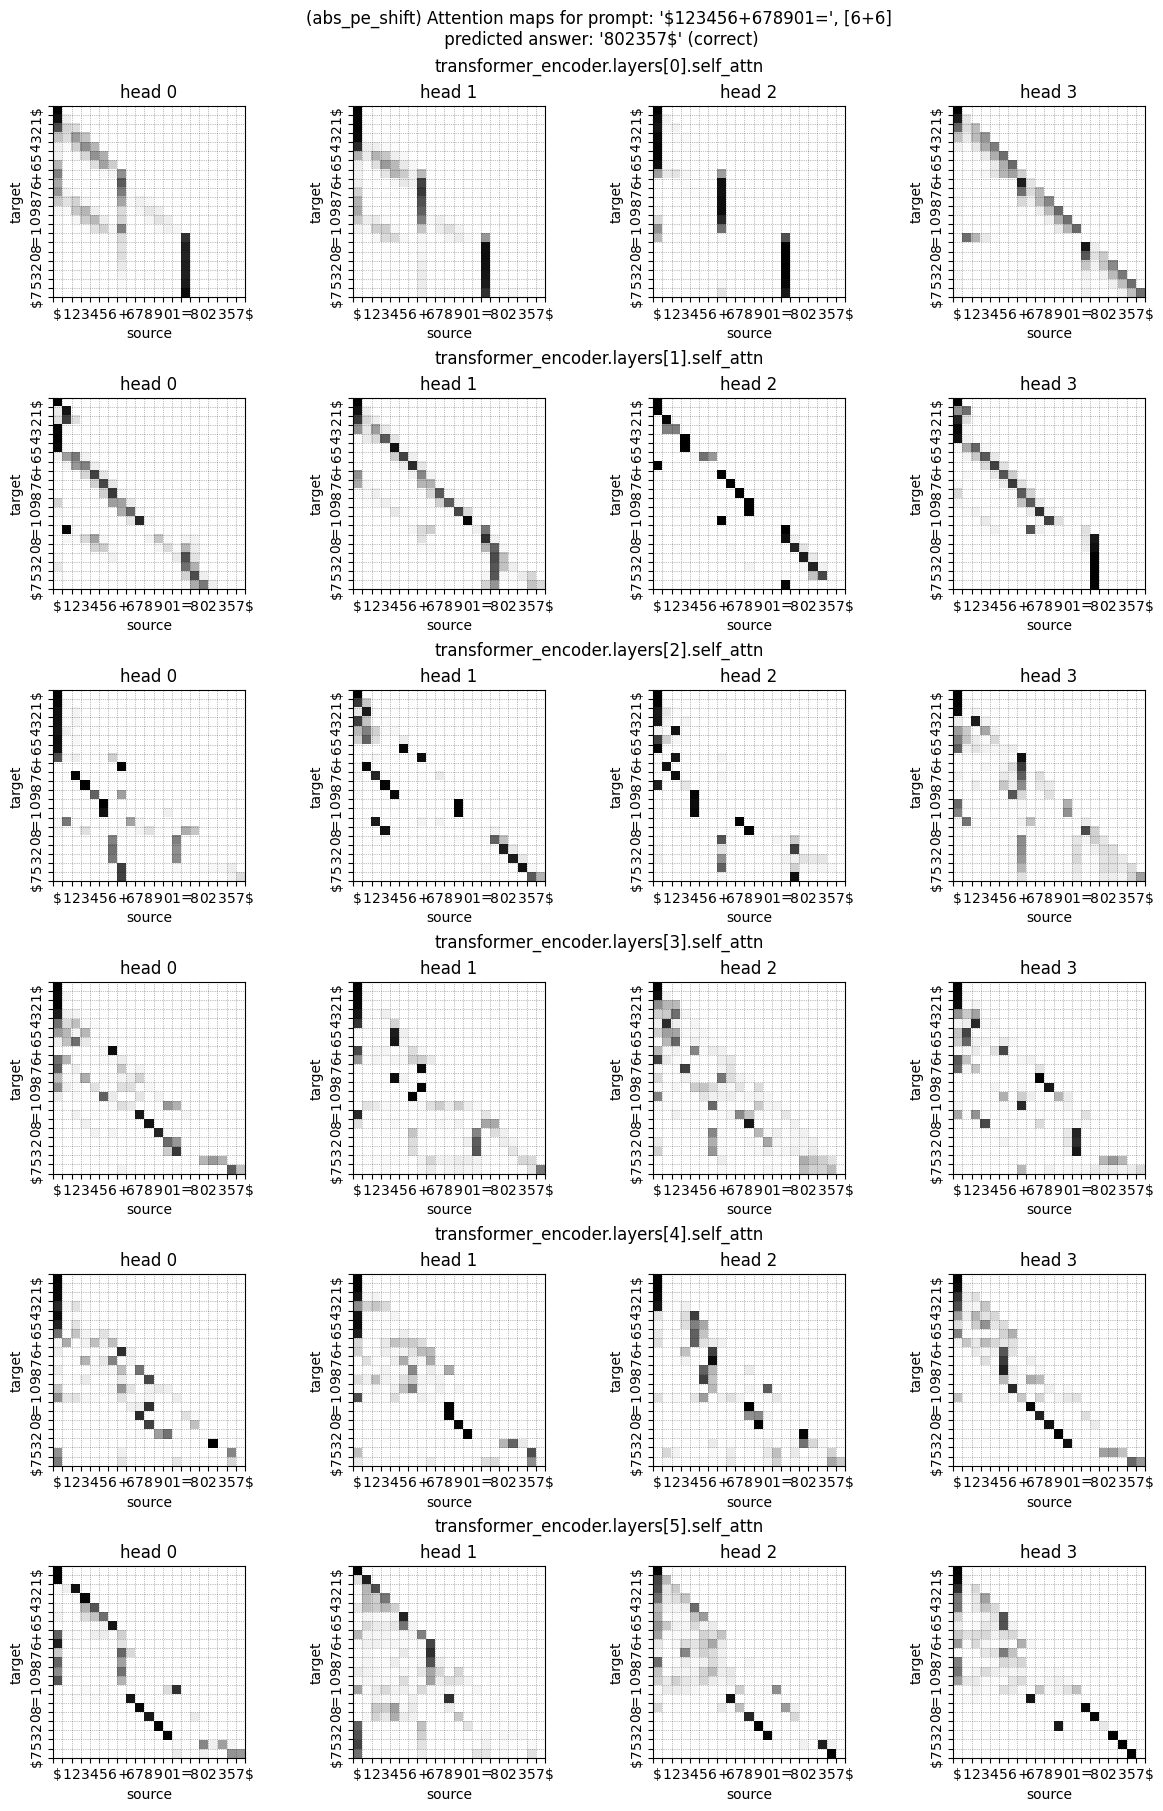

prompt: '$123456+678901=' 6+6
true_ans: 802357
pred_answer: 8023457$
transformer_encoder.layers[0].self_attn torch.Size([1, 4, 22, 22])
transformer_encoder.layers[1].self_attn torch.Size([1, 4, 22, 22])
transformer_encoder.layers[2].self_attn torch.Size([1, 4, 22, 22])
transformer_encoder.layers[3].self_attn torch.Size([1, 4, 22, 22])
transformer_encoder.layers[4].self_attn torch.Size([1, 4, 22, 22])
transformer_encoder.layers[5].self_attn torch.Size([1, 4, 22, 22])


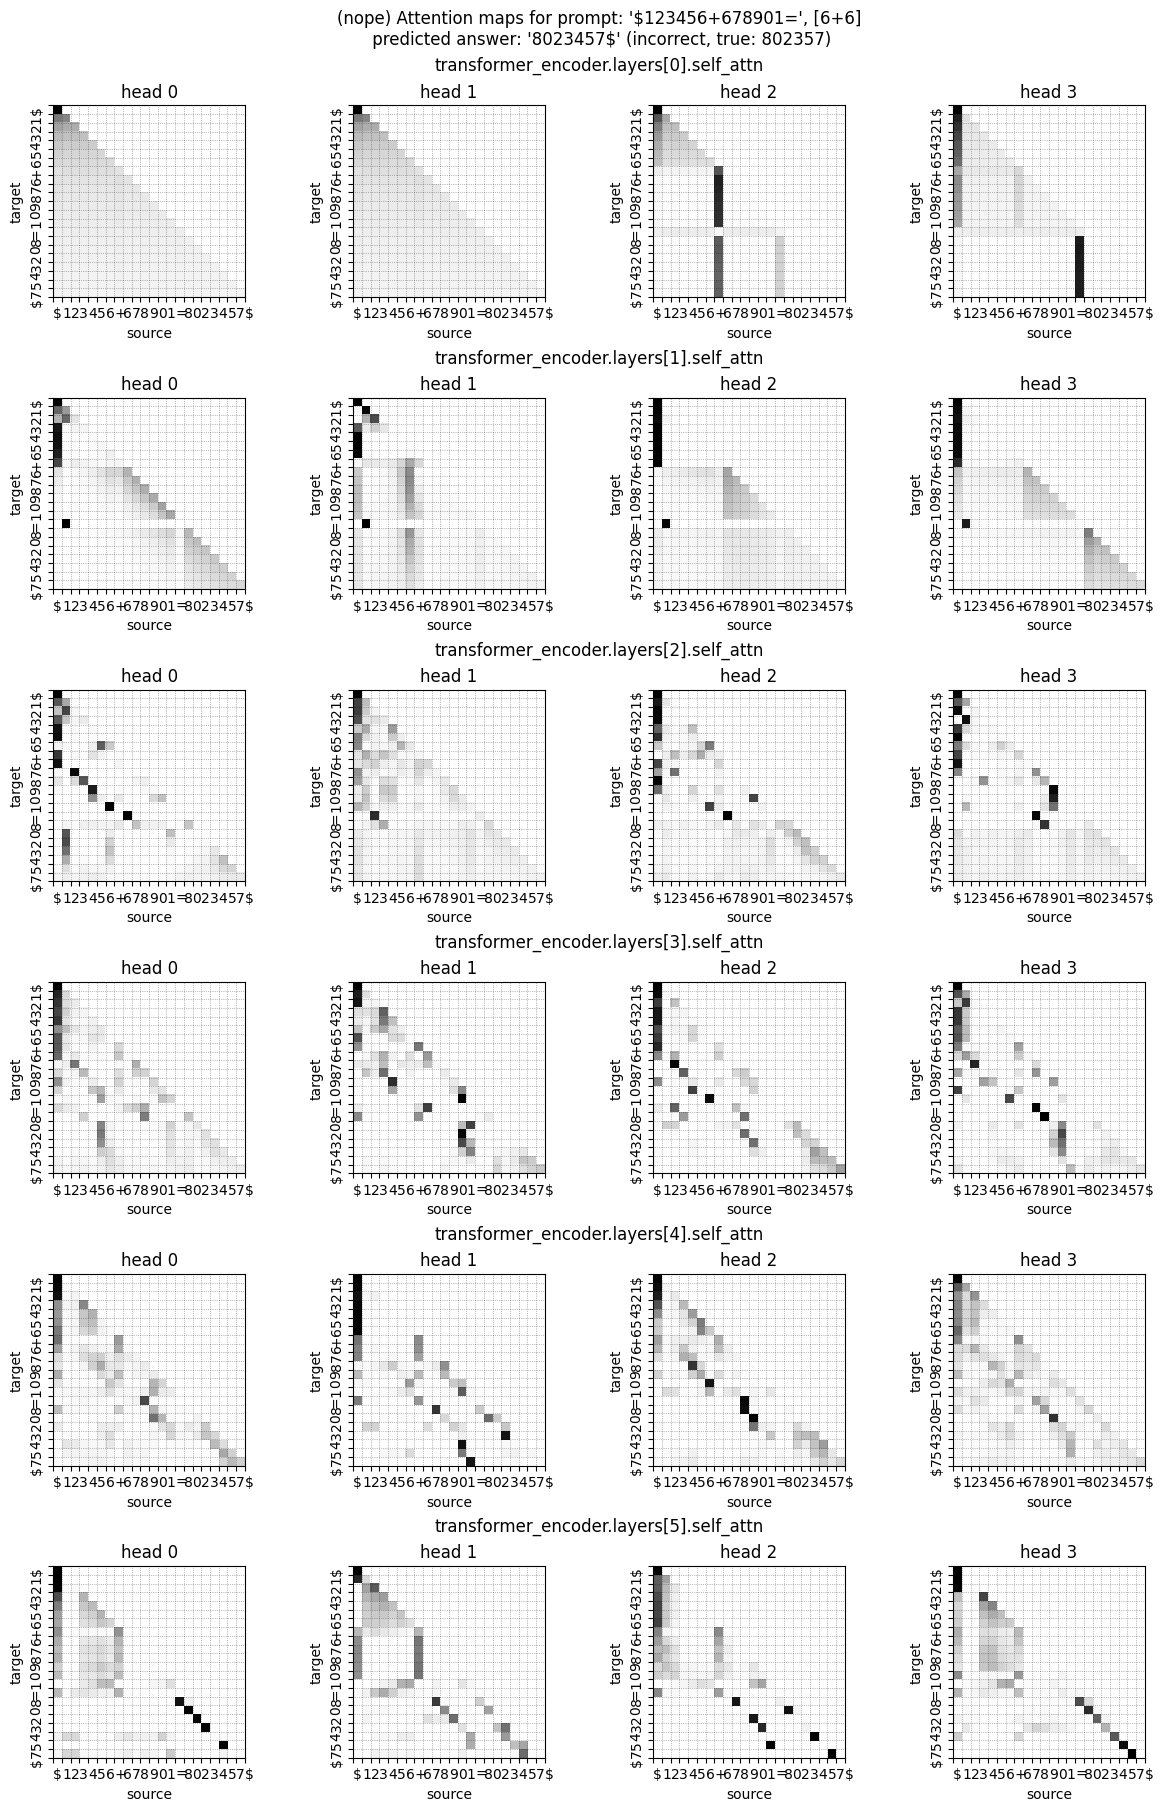

prompt: '$123456+678901=' 6+6
true_ans: 802357
pred_answer: 802357$
transformer_encoder.layers[0].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[1].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[2].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[3].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[4].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[5].self_attn torch.Size([1, 4, 21, 21])


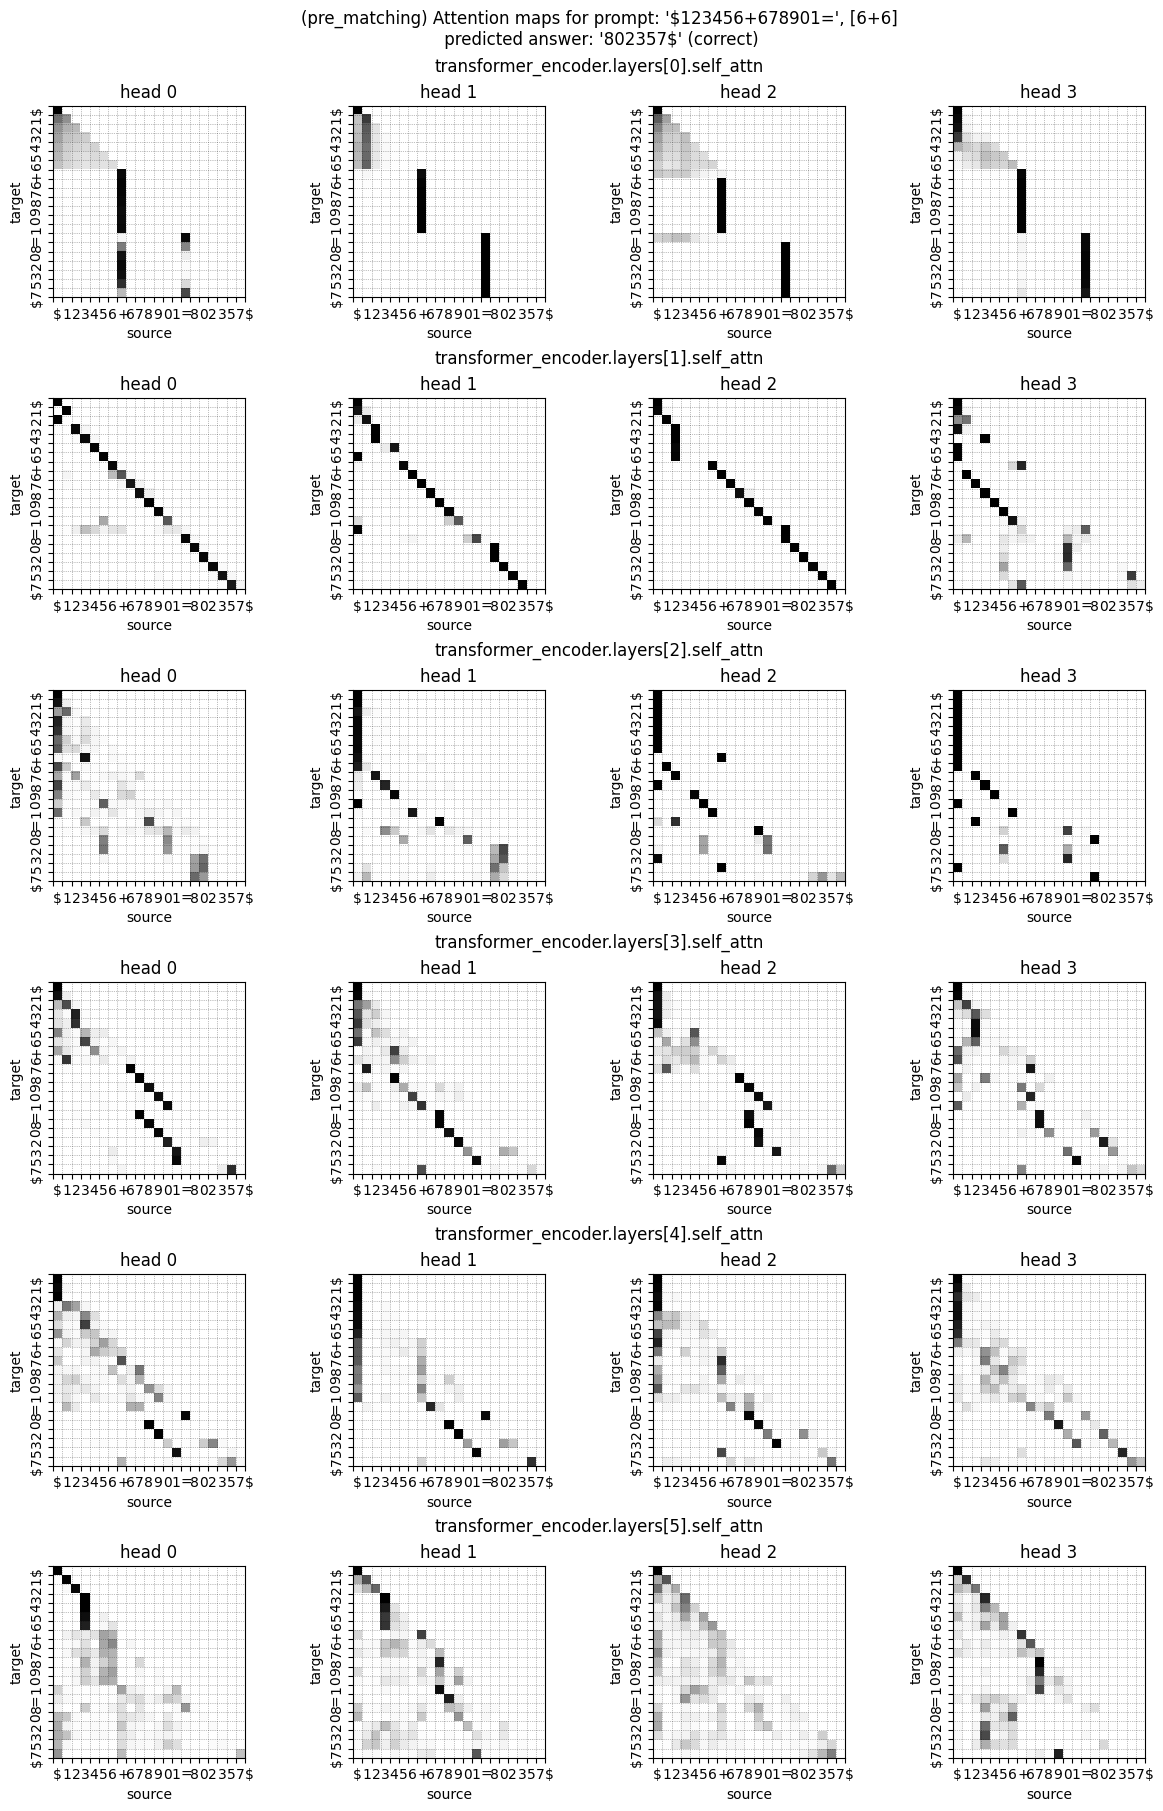

prompt: '$123456+678901=' 6+6
true_ans: 802357
pred_answer: 802357$
transformer_encoder.layers[0].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[1].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[2].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[3].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[4].self_attn torch.Size([1, 4, 21, 21])
transformer_encoder.layers[5].self_attn torch.Size([1, 4, 21, 21])


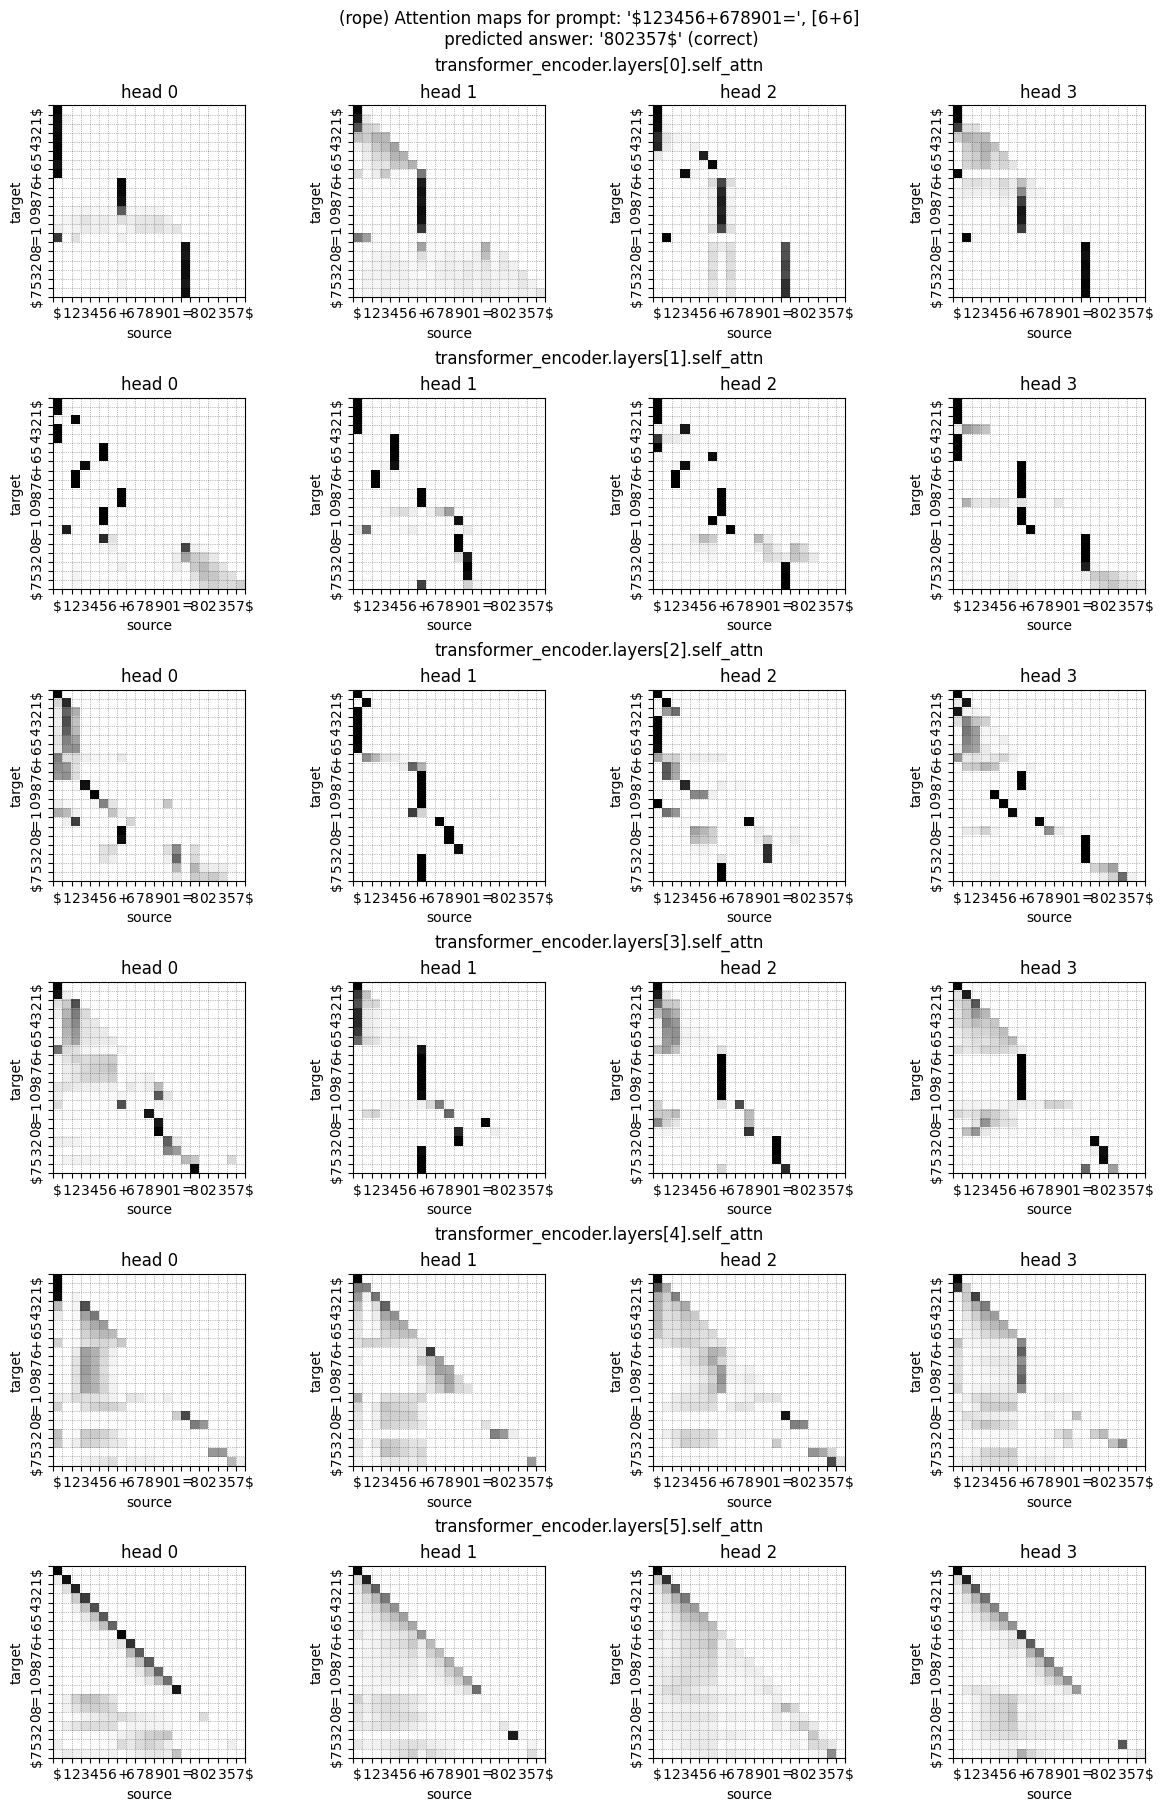

In [7]:
for model_name, ckpt_path in ckpts.items():
    model, hparams = load_model(ckpt_path)

    module_names = [mn for mn, _ in model.named_modules() if mn.endswith("self_attn")]
    # replace index to get correct syntax
    module_names = [re.sub(r"\.(\d+)\.", r"[\1].", mn) for mn in module_names]

    a, b = 123456, 678901
    savepath = subdir / f"exp15_attn_map_{a}+{b}_{model_name}.png"
    fig_scale = 3
    kwargs = dict(
        tokenizer=tokenizer,
        a=a,
        b=b,
        module_names=module_names,
        fig_scale=fig_scale,
        save=True,
    )
    attn_maps = plot_attn_maps(
        model=model,
        savepath=str(savepath),
        figtitle_prefix=f"({model_name})",
        reverse_ops=False,
        reverse_ans=False,
        **kwargs,
    )